In [38]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [39]:
import os
from oivis.oimisc import mcfost_load
from oivis.oifourier import imavis
from oivis.oifits import oifits_read
import importlib
from astropy.io import fits

In [40]:
from scipy.constants import arcsecond

In [41]:
datadir = os.path.dirname(os.path.abspath(".")) + "/data/"

In [42]:
importlib.reload(mcfost_load)
importlib.reload(oifits_read)
importlib.reload(imavis)

<module 'oivis.oifourier.imavis' from '/Users/bergejea/Software/tihpy/oivis/oifourier/imavis.py'>

In [43]:
wavel, pixel, data = mcfost_load.load_cube(datadir + "mcfost_hd100546_RT.fits.gz")

In [44]:
data.shape

(1, 1, 1, 1001, 1001)

In [45]:
file = "Aspro2_HD_100546_mcfost.fits"

In [46]:
# il faut corriger la longueur d'onde car aspro2 ne se sert pas de la longueur d'onde contenue dans le fichier mcfost
# la longueur d'onde de l'oifits est
wavel = 2.2e-6

In [47]:
hdr = fits.open(datadir + file)

In [107]:
oid = oifits_read.Oifits([datadir + file])

INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/Aspro2_HD_100546_mcfost.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header


In [108]:
freq = [oid.v2data['UCOORD'] / wavel, oid.v2data['VCOORD'] / wavel]

In [109]:
base = np.sqrt(freq[0]**2 + freq[1]**2) * wavel

In [20]:
pixsize = pixel /180 *np.pi 

In [21]:
visas = imavis.ima_to_vis(data[0,0,0,:,::-1]/np.sum(data[0,0,0,:,:]), freq, pixsize, sigmul=0, sigadd=0)

Multiplicative noise variance 0
Additive noise variance 0


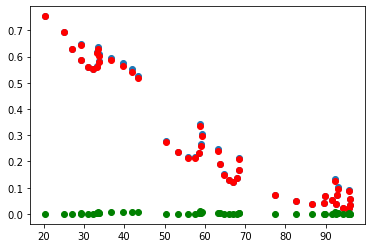

In [22]:
plot(base,np.abs(visas)**2,'o')
plot(base,oid.v2data['VIS2DATA'], 'ro')
plot(base, np.abs(np.abs(visas)**2 - oid.v2data['VIS2DATA']),'go')

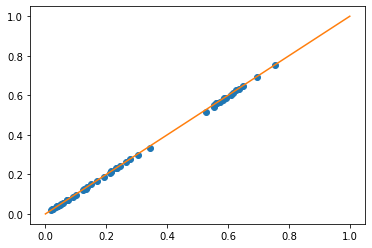

In [24]:
plot(np.abs(visas)**2,oid.v2data['VIS2DATA'],'o' )
plot([0,1],[0,1])

*** Ca marche !!!***

In [67]:
wavel, pixel, data = mcfost_load.load_cube(datadir + "mcfost_hd100546_RT.fits.gz")

In [68]:
pixelsize = pixel /180 *np.pi 

In [138]:
test_image = data[0,0,0,:,:] / np.sum(data[0,0,0,:,:])
dimima = test_image.shape[0]

In [139]:
freqsamp = 1/(dimima * pixelsize)
grid_u, grid_v = np.mgrid[-freqsamp: freqsamp:dimima*1j, -freqsamp: freqsamp:dimima*1j]

In [140]:
uvpoints = np.transpose(np.array([np.ravel(grid_u), np.ravel(grid_v)]))
frequv = np.transpose(np.array([oid.v2data['UCOORD'] / wavel, oid.v2data['VCOORD'] / wavel]))

In [141]:
fftima = np.fft.fftshift(np.fft.fft2(test_image))
fftimanorm = fftima / np.max(np.abs(fftima))

In [142]:
from  scipy.interpolate import griddata

In [143]:
np.max(fftimanorm)

(1+0j)

In [146]:
visib_z0

array([-0.00134133-0.00010629j, -0.00134133-0.00010629j,
       -0.00134133-0.00010629j, -0.00134133-0.00010629j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
       -0.00134133-0.00010629j, -0.00134133-0.00010629j,
        0.00133468+0.00020078j, -0.00134133-0.00010629j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j, -0.00134133+0.00010629j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j, -0.00134133+0.00010629j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j, -0.00134133+0.00010629j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,  0.00133468+0.00020078j,
        0.00133468+0.00020078j,

In [144]:
visib_z0 = griddata(uvpoints, np.ravel(fftimanorm), frequv, method="nearest")

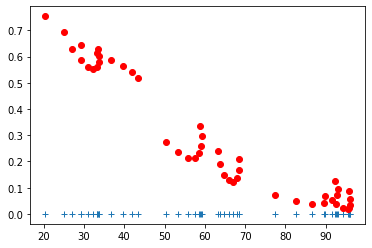

In [145]:
#plot(base,np.abs(visas)**2,'o')
plot(base, np.abs(visib_z0)**2,'+')
plot(base,oid.v2data['VIS2DATA'], 'ro')
#plot(base, np.abs(np.abs(visas)**2 - oid.v2data['VIS2DATA']),'go')

In [81]:
uvpoints.shape

(1002001, 2)

1002001

In [82]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [83]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [84]:
rng = np.random.default_rng()

points = rng.random((1000, 2))

values = func(points[:,0], points[:,1])

In [89]:
freq.shape

(2, 48)

In [87]:
freq.shape

AttributeError: 'list' object has no attribute 'shape'